## Assginment 1

## Ensemble

여러 esitmator를 결합하여 더 좋은 estimator을 만드는 것!!

앙상블 방법의 종류는 estimator들을 어떻게 결합할 것인지에 의해 결정된다

# #ERROR

어느 모델에서나 나타나는 오류 세가지 존재


### 1. bias error
-예측값이 실제 값과 얼마나 다른지 평균화하는데 유용함.
-높은 bias error = 중요한 추세가 누락 된 성능이 낮은 모델을 의미

### 2. variance

-추정 값들의 흩어진 정도
-동일한 관찰에 대한 예측이 서로 어떻게 다른지 정량화.
-높은 variance 모델 = training population에서 over-fit, training이 아닌 관측에서는 성능이 저하


-> 모델은 Bias error와 Variance error간에 균형을 유지해야 함. 
이를  bias-variance errors의  trade-off management 라고 함. 
->앙상블 학습은 이러한 trade-off management 을 수행하는 한 가지 방법!


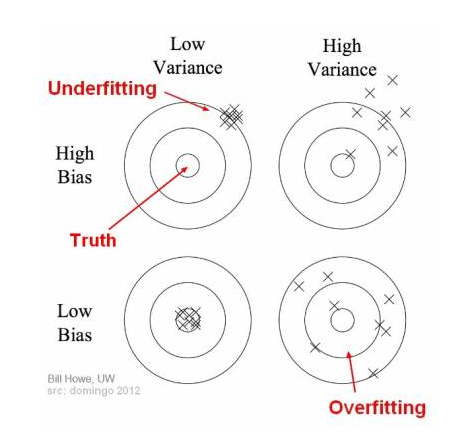

In [1]:
from IPython.display import Image
Image("variance.png")  

### 앙상블

예측 변수의 그룹-> 앙상블
이 기술-> 앙상블 학습
앙상블 학습 알고리즘 -> 앙상블 기법

예측 변수 그룹(decision tree classifier, SVM, logistic regression)의 예측을 합쳐, 최상의 개별 예측 변수보다 더 나은 예측을 얻을 수 있음

ex) 수천 명의 임의의 사람들에게 복잡한 질문을 한 다음 답변을 집계한다고 가정하자. 많은 경우이 집계 된 답변이 전문가의 답변보다 낫다는 것을 알게 될 것이다.(군중의 지혜)

(차례)
### Basic Ensemble Techniques

Max Voting

Averaging

Weighted Average


### Advanced Ensemble Techniques

Stacking

Blending

Bagging

Boosting


### Algorithms based on Bagging and Boosting

Bagging meta-estimator

Random Forest

AdaBoost

GBM

XGB

Light GBM

CatBoos

# #Types of ensembling

## 1. Basic Ensemble Techniques



### 1-1 Max voting

-일반적으로 분류문제에 사용.
-각 데이터 포인트에 대한 예측을 위해 다양한 모델들이 사용된다
-각 모델의 예측은 '투표'로 간주되어 대다수의 모델들로부터 얻은 예측이 최종 예측이 된다

ex) 당신이 5명의 동료들에게 당신의 영화를 평가해 달라고 부탁했을 때, 그들 중 3명이 4로 등급을 매긴 반면에 그들 중 2명은 5로 등급을 매겼다면
대다수의 동류들이 4등급을 주었기 때문에 최종등급은 4등급이 된다!

In [ ]:
#max voting code
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [ ]:
#max voting code
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
#VotingClassifier 을 사용한다
#이때 함수 인자??
model.fit(x_train,y_train)
model.score(x_test,y_test)

### ++Hard Voting / Soft Voting

Hard Voting은 단순 투표.
Soft Voting은 투표에 가중치를 부여한다(조건부 확률의 합!) -> 이게 성능 더 좋음




### 1-2 Averaging:

-max voting기법과 유사
-모든 model에서 '평균' 예측을 가져 와서 최종 예측에 사용
-평균화는 회귀 문제에서 예측을 하거나 분류 문제의 확률을 계산하는 데 사용할 수 있음


ex) (5+4+5+4+4)/5 = 4.4

### 1-3 Weighted Average

-각각의 모델의 중요성을 정의하는 서로 다른 가중치가 할당됨.

ex) 동료 중 두 명이 전문가이고 다른 사람이이 분야에 대한 사전 경험이없는 경우, 다른 두 사람에 비해 두 명의 답변이 더 중요하다. 
결과는 다음과 같이 계산!

ex) [(50.23) + (40.23) + (50.18) + (40.18) + (40.18)] = 4.41.

## 2. Advanced Ensemble 

### 2-1 Bagging

** 샘플을 여러 번 뽑아 각 모델을 학습시켜 결과를 집계(Aggregating)하는 방법이다

-배깅은 경쟁에서 매우 일반적임. 그러나 이것이 작동하려면 데이터에 variance가 있어야 한다



Stability and Accuracy.

-각 예측 set를 저장하고 이를 평균화하면 편차에 영향을 주지 않고 분산을 낮출뿐만 아니라 정확도를 향상시킬 수 있다.

-본질적으로, 우리는 많은 다른 모델들을 만들고 함께 모으고 있는데, 이렇게하면 과적 합을 피하고 예측을 안정화하며 정확도를 높일 수 있다. 데이터엔 variance가 존재함! 만약 그렇지않다면 bagging은 도움이되지 않음

-배깅은  bootstrapping의 통계적 방법을 기반으로 합니다.

<방법>

1.replacement를 통해 subset을 만든다. 모든 항목이 다른 subset에 나타날 수 있음

2.샘플의 모든 subset에 모델을 적용

3.모델은 병렬로 실행되며 서로 독립적!

4.각 모델을 사용하여 x- text 예측

5.그다음 예측을 집계 (투표 또는 평균화)하여 최종 예측을 형성

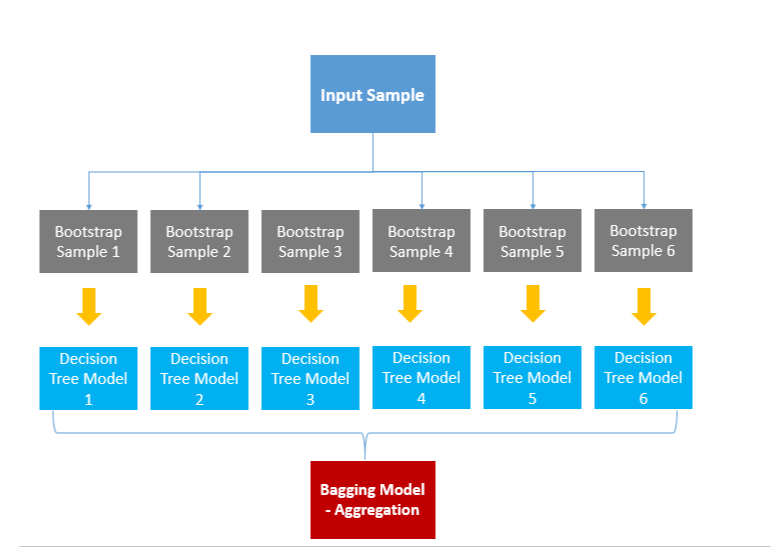

In [2]:
from IPython.display import Image
Image("bg.png")  

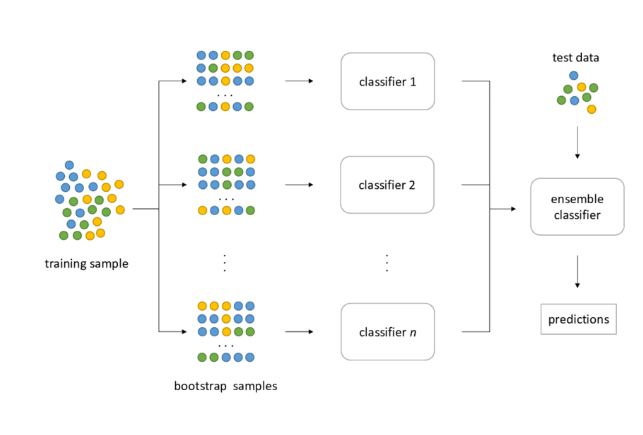

In [3]:
from IPython.display import Image
Image("bagging.png")  

## ((Bagging algorithm))
    
### 1.Bagging meta-estimaor

Bagging meta-estimator:

-분류 (BaggingClassifier) 및 회귀 (BaggingRegressor) 문제 모두에 사용할 수 있는  앙상블 알고리즘

-예측을 위해 전형적인 배깅을 사용함.

<bagging meta-estimator 알고리즘의 단계>

1.랜덤 sub set은 원래 데이터 세트 (부트 스트랩)에서 작성됨

2.데이터 집합의 하위 집합에는 모든 기능이 포함됨

3.이러한 작은 set들 각각에, 사용자 지정 기준 추정기가 장착되어 있음!

4.각각의 모델의 예측은 최종 결과를 얻기 위해 결합된다




In [ ]:
final_dt = DecisionTreeClassifier(max_leaf_nodes=10, max_depth=5)                   
final_bc = BaggingClassifier(base_estimator=final_dt, n_estimators=40, random_state=1, oob_score=True)

final_bc.fit(X_train, train_y)
final_preds = final_bc.predict(X_test)


acc_oob = final_bc.oob_score_
print(acc_oob)  

--->BaggingClassifier 인자들 설명

base_estimator : 데이터 세트의 임의의 서브 세트에 맞도록 기본 추정기를 정의(아무것도 지정하지 않으면 기본 추정기는 결정 트리)

n_estimators : 생성 할 기본 추정기의 수. 많은 수는 실행하는 데 시간이 오래 걸리고 소수의 경우 최상의 결과를 얻지 못할 수 있으므로 추정기 수는 신중하게 조정해야함!!

max_samples :sub set의 크기를 제어. 각 기본 추정기를 훈련시키는 최대 샘플 수

max_features : 전체 data set에서 그릴 피처 수를 제어,  각 기본 추정기를 훈련시키는 데 필요한 최대 기능 수를 정의함.

n_jobs: 병렬로 실행할 작업 수. 이 값을 시스템의 코어와 동일하게 설정한다. (-1이면 작업 수는 코어 수로 설정됨)

random_state : 랜덤 분할 방법을 지정. 임의의 상태 값이 두 모델에서 동일하면 임의 선택이 두 모델에서 동일함.이 매개 변수는 다른 모델을 비교할 때 유용!

### 2.Random Forest

*forest: 임의로 데이터 포인트와 기능을 선택하고 여러 트리를 생성!

랜덤 포레스트:
-배깅 기술을 따르는 또 다른 앙상블 머신 러닝 알고리즘 


-bagging estimator 알고리즘의 연장

-random forest의 기본 estimator는 결정 트리

-random forest는 결정 트리의 각 노드에서 최상의 분할을 결정하는 데 사용되는 feature set을 무작위로 선택함

<작업 단계>
1.Random subset은 원래 data set(bootstrapping)에서 형성됨

2.결정 트리의 각 노드에서 최상의 분할을 정하기 위해 임의의 feature set만 고려된다

3.각 하위 집합에 의사결정 트리 모델이 장착되고,  최종 예측은 모든 결정 트리의 예측을 평균하여 계산됨.

cf) random forest의 결정 트리는 data 및 feature의 sub set을 기반으로 구축 할 수 있음. random forrest의 sklearn 모델은 결정 트리에 모든 기능을 사용하며 각 노드에서 분할하기 위해 feature의 sub set이 임의로 선택된다


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

---> parameters

n_estimators: random forest에서 생성될 의사결정 나무의 수
일반적으로 숫자가 높을수록 예측은 더 강해지고 안정적이지만, 매우 큰 숫자는 더 많은 훈련 시간을 야기할 수 있음

criterion: split에 사용할 기능을 정의,각 feature에 대한 split quality를 측정하고 최상의 split을 선택한다.

max_features : 각 의사결정 트리의 분할에 허용되는 최대 feautre의 수. 늘리면 대개 성능이 향상되지만, 매우 높은 숫자는 각 트리의 다양성을 감소시킬 수 있다.

max_deep: 랜덤 포리스트에는 여러 개의 의사결정 트리가 있는데, 이 매개변수는 트리의 최대 깊이를 정의함

min_samples_split: 분할을 시도하기 전에 리프 노드에서 필요한 최소 샘플 수를 정의하는 데 사용. 샘플 수가 필요한 수보다 적으면 노드는 분할되지 않는다.

min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수를 정의. 잎 크기가 작을수록 모델은 열차 데이터에서 noise를 포착하기 쉽다.

max_leaf_node: 각 트리의 최대 리프 노드 수를 지정. 잎 노드의 수가 최대 리프 노드와 같아지면 트리는 분할을 중지한다

n_jobs: 병렬로 실행할 작업 수

## 2-2 Boosting

부스팅 (Boosting)'이라는 용어:
weak learner를 strong learner로 전환시키는 알고리즘 군을 의미.

부스팅:
-주어진 학습 알고리즘의 모델 예측을 개선하기위한 앙상블 방법
-weak learner들을 순차적으로 훈련시킨다
-부스팅은 "팀워크"에 관한 것이다. 
-실행되는 각 모델은 다음 모델이 집중할 feature를 결정함

### ((Boosting algorithm))

### 1. AdaBoost

(Adaptive Boosting) AdaBoost:

-가장 간단한 부스팅 알고리즘 중 하나

-AdaBoost는 잘못 예측 된 관측치에 가중치를 할당하고 후속 모델은 이러한 값을 올바르게 예측한다

<단계> :

1.데이터 세트의 모든 관측치에 동일한 가중치가 부여됨

2.모델은 데이터의 하위 집합을 기반으로 함

3.이 모델을 사용하여 전체 data set에 대한 예측이 이루어진다

4.오류는 예측과 실제 값을 비교하여 계산됨

5.다음 모델을 생성하는 동안 잘못 예측 된 데이터 포인트에 더 높은 가중치가 부여됩니다.

6.오차 값을 사용하여 가중치를 결정할 수 있음.
ex)오차가 높을수록 관측치에 할당 된 가중치가 더 커진다

7.이 과정은 error function이 변경되지 않거나 추정기 수의 최대 한계에 도달 할 때까지 반복된다

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)


#Sample code for regression problem:

from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

-->Parameters
    
base_estimators: 기본 추정기의 유형, 

n_estimators:  기본 추정기의 수를 정의기본값은 10이지만 더 나은 성능을 얻으려면 더 높은 값을 유지해야 함.

learning_rate: 최종 조합에서 추정량의 기여도를 제어

->learning_rate와 n_estimators 사이에는 상충 관계 있음!

max_depth: 개별 추정기의 최대 깊이를 정의

n_jobs: 사용할 수있는 프로세서 수를 지정  최대 프로세서 허용 값을 –1로 설정

random_state : 랜덤 데이터 분할을 지정하는 정수 값 random_state의 한정된 값은 동일한 매개 변수 및 학습 데이터가 제공되는 경우 항상 동일한 결과를 생성함

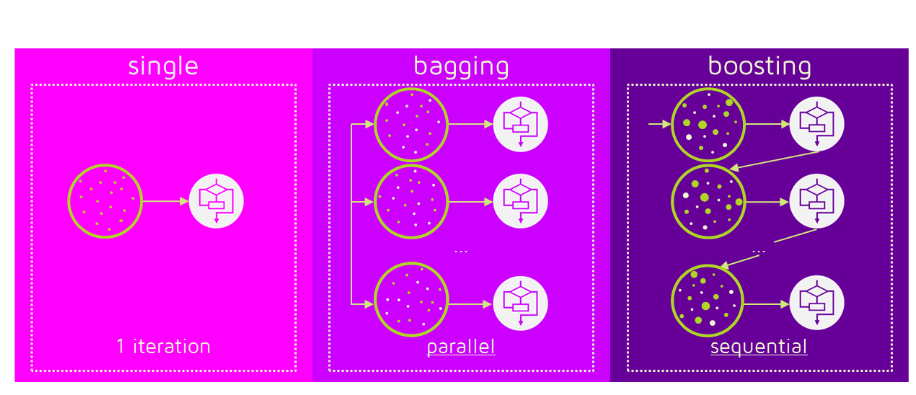

In [5]:
Image("a.png")  

## 2-3 Stacking

-부스팅과 유사

-원본 데이터에 여러 모델을 적용 할 수 있음 

-부스팅과 달리 가중치 함수에 대한 경험적 공식이 아니라 메타 레벨을 도입하고 다른 모델 , 접근법을 사용하여 가중치를 추정하기 위해 모든 모델의 output과 함께 input을 추정한다

-즉, 어떤 모델이 잘 수행되고 어떤 입력 데이터에 나쁜 영향을 주었는지 확인한다

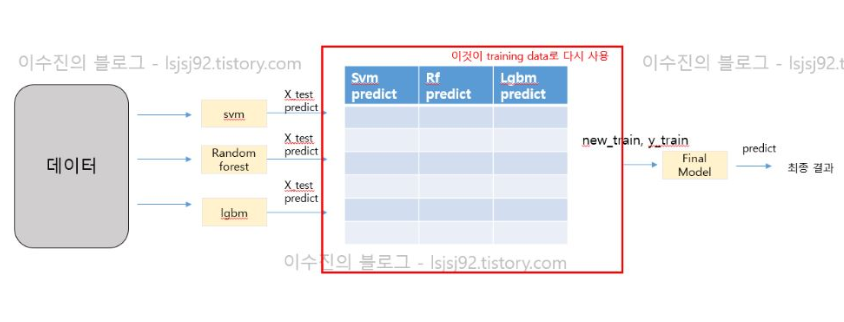

In [4]:
from IPython.display import Image
Image("stacking.png")  